# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Zharfan Dawud Harwiraputera
- **Email:** zharfandh@gmail.com
- **ID Dicoding:** trenchboy

## Menentukan Pertanyaan Bisnis

- Pada bulan apakah puncak penggunaan rental sepeda terjadi?
- Adakah kaitan terhadap temperatur dengan penggunaan rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [6]:
df = pd.read_csv("bike_sharing_dataset/day.csv") # Import data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
df.info() # Mengecek masing masing atribut dari data, berdasarkan sumber seharusnya ada 731 instansi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Mengacu kepada file README.txt yang merupakan metadata dari Bike Sharing Dataset, berikut merupakan penjelasan dari masing masing atribut:**<br>
\- instant : record index<br>
\- dteday  : tanggal<br>
\- season  : musim (1:springer, 2:summer, 3:fall, 4:winter)<br>
\- yr      : tahun (0: 2011, 1:2012)<br>
\- mnth    : bulan ( 1 to 12)<br>
\- hr             : jam (0 to 23)<br>
\- holiday        : hari libur atau tidak (extracted from http://dchr.dc.gov/page/holiday-schedule)<br>
\- weekday        : hari di minggu ini<br>
\- workingday     : jika bukan weekend atau holiday maka 1, sebaliknya 0.<br>
	\+ weathersit : <br>
> \- 1: Cerah, Sedikit awan, Sebagian berawan<br>
> \- 2: Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut<br>
> \- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan<br>
> \- 4: Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut<br>

\- temp : Suhu yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 41 (maks)<br>
\- atemp: Suhu perasaan yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 50 (maks)<br>
\- hum: Kelembapan yang dinormalisasi. Nilai dibagi menjadi 100 (maks)<br>
\- windspeed: Kecepatan angin yang dinormalisasi. Nilai dibagi menjadi 67 (maks)<br>
\- casual: jumlah pengguna biasa<br>
\- registered: jumlah pengguna terdaftar<br>
\- cnt: jumlah total sepeda sewaan termasuk yang kasual dan terdaftar<br>

In [21]:
df.isna().sum() # Memastikan ke-absenan missing values berdasarkan info diatas

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
df.drop_duplicates(inplace=True) # Langsung hilangkan duplikasi data jika ada
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [24]:
df.describe() # Mencari inakurasi data menggunakan function describe

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Kita bisa lihat dari extreme valuesnya, tidak ada value yang inakurat. Sesuai dengan metadata yang terlampir**

## Exploratory Data Analysis

In [26]:
df.describe(include="all") # Mengexplore data menggunakan function describe dengan parameter include="all"

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

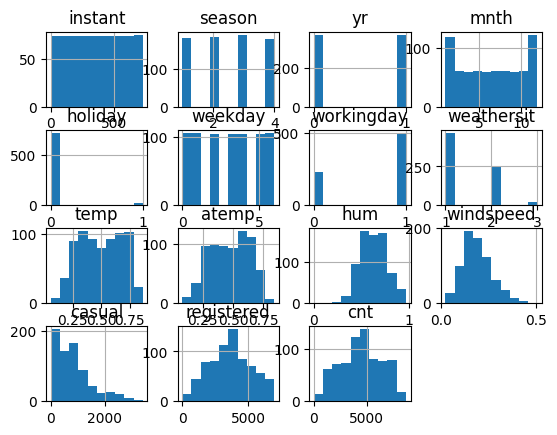

In [46]:
df.hist()

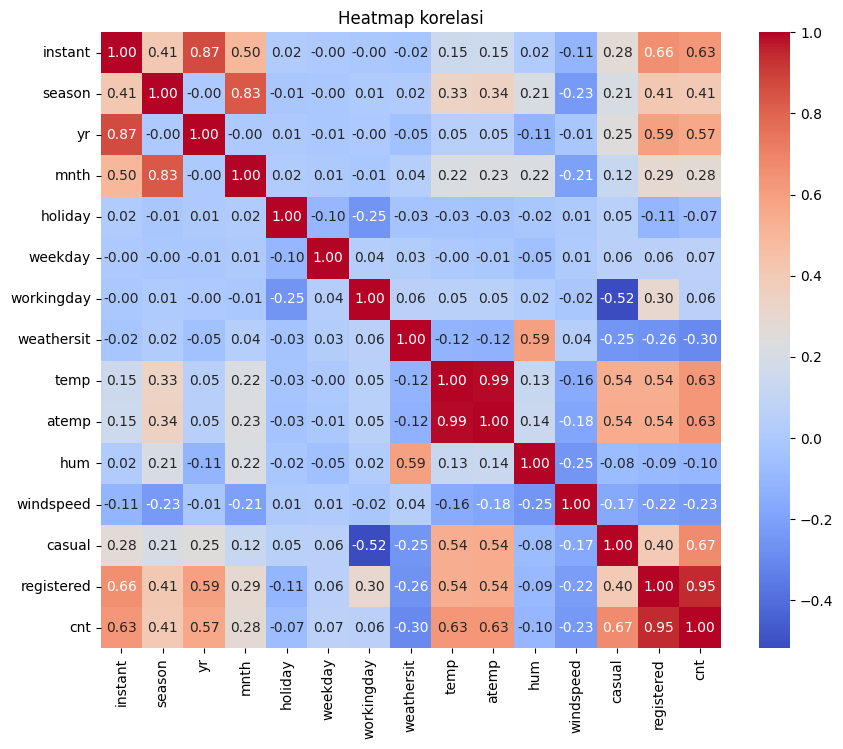

In [49]:
matrix_korelasi=df.corr(numeric_only=True) # Melihat korelasi antara atribut dengan menggunakan paramater numeric_only..
                                           # ..yang diset True agar atribut tanggal tidak dimasukkan

# Visualisasikan korelasi untuk mempermudah pembaca
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap korelasi')
plt.show()

## Membuat Visualisasi Data

### Pertanyaan 1: Pada bulan apakah puncak penggunaan rental sepeda terjadi?

In [62]:
count_per_month = df.groupby("mnth")["cnt"].sum()

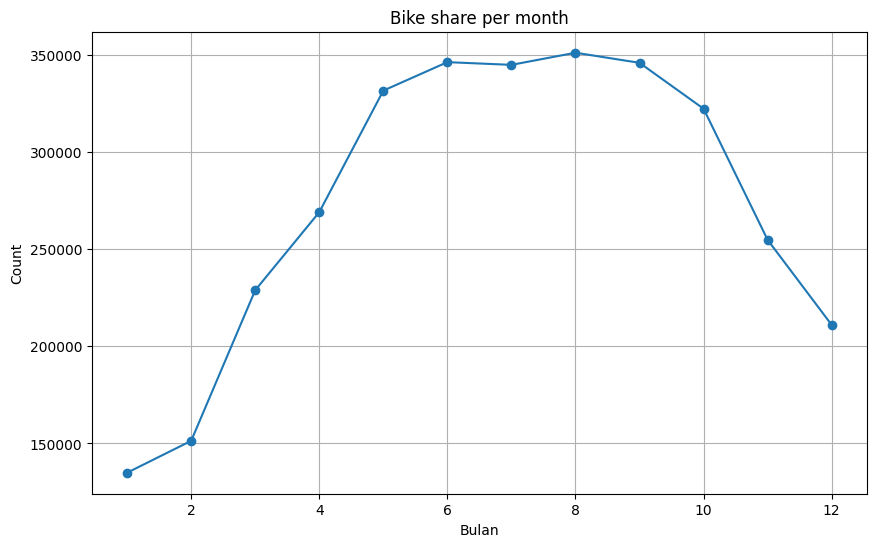

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(count_per_month.index, count_per_month.values, marker='o', linestyle='-')
plt.title('Bike share per month')
plt.xlabel('Bulan')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Pertanyaan 2: Adakah kaitan terhadap temperatur dengan penggunaan rental sepeda?

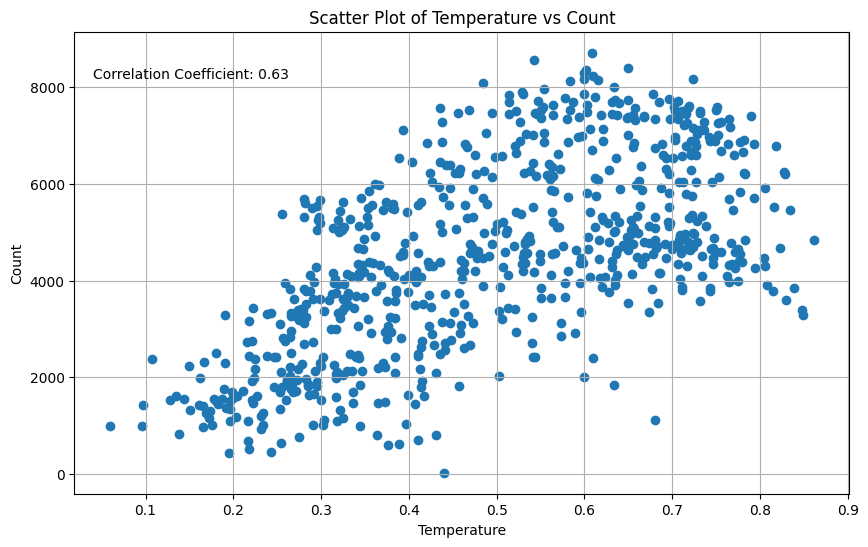

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(df['temp'], df['cnt'])
plt.title('Scatter Plot of Temperature vs Count')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.grid(True)

correlation_coefficient = np.corrcoef(df['temp'], df['cnt'])[0, 1]
plt.annotate(f'Correlation Coefficient: {correlation_coefficient:.2f}',
             xy=(0.15, 0.90),
             xycoords='axes fraction',
             ha='center',
             fontsize=10)

plt.show()

## Conclusion

- Conclution pertanyaan 1: Dilihat dari line plot diatas, bulan 8 atau bulan Agustus adalah puncak bulan rental sepeda
- Conclution pertanyaan 2: Dilihat dari scatter plot diatas, terdapat korelasi positif dengan koefisien 0.63 yang artinya adanya korelasi kuat antara temperatur dengan sepeda